In [101]:
# handling data
import numpy as np
import pandas as pd

# plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
from sklearn.linear_model import LinearRegression

# handling telomere length data
import fukushima_telomere_methods as f_tm

# for loading telo data column containing individual
# telomere length values, enables literal reading of a list as numbers
from ast import literal_eval

# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
&nbsp; 

...

&nbsp; 

---

In [3]:
# setting all graphs to have darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# Mean Telomere Length and Dose
---

In [230]:
# Loading New Dose Quantifications (+age/sex data), Cortisol, Telomere FISH, and Dicentric Data

In [33]:
kelly_boar_dose = pd.read_csv('../excel data/cleaned/kelly_boar_dose.csv')
prep_boar_cortisol_df = pd.read_csv('../excel data/cleaned/prep_boar_cortisol_df.csv')
kelly_boar_teloFISH_df = pd.read_csv('../excel data/cleaned/kelly_boar_teloFISH_df.csv')
kelly_boar_dicentrics_df = pd.read_csv('../excel data/cleaned/kelly_boar_dicentrics_df.csv')

## Merging Kelly's Telomere FISH data w/ New Dose Quantifications (+age/sex data)

In [95]:
# general cols of interest
general_cols_of_interest = ['Sample ID', 'Sex', 'Age (months)', 
                            'INTERNAL Life time dose, mGy 134+137',
                            'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
                            'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
                            'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)'
                           ]

In [48]:
merge_kelly_teloFISH_dose = kelly_boar_teloFISH_df.merge(kelly_boar_dose, on=['Sample ID'])

# making new df for handling feature engineering of individual telo measurements, i.e counts of short/long telos 
place_hold_merge_kelly_teloFISH_dose_telo_counts = merge_kelly_teloFISH_dose.copy()

# selecting cols of interest 
merge_kelly_teloFISH_dose = merge_kelly_teloFISH_dose[['Sample ID', 'Sex', 'Age (months)', 'teloFISH means', 
                                                       'INTERNAL Life time dose, mGy 134+137',
                                                       'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
                                                       'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
                                                       'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)'
                                                      ]]

In [49]:
merge_kelly_teloFISH_dose.rename(columns={'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)': 
                                          'Dose rate (uGy per h)'}, inplace=True)

In [51]:
# enforcing col types
for col in merge_kelly_teloFISH_dose.columns:
    if col == 'Sample ID' or col == 'Sex':
        merge_kelly_teloFISH_dose[col] = merge_kelly_teloFISH_dose[col].astype('str')
    elif col == 'Age (months)':
        merge_kelly_teloFISH_dose[col] = merge_kelly_teloFISH_dose[col].astype('int64')
    else:
        merge_kelly_teloFISH_dose[col] = merge_kelly_teloFISH_dose[col].astype('float64')

In [84]:
dose_types = ['INTERNAL Life time dose, mGy 134+137',
              'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
              'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
              'Dose rate (uGy per h)'
             ]

## Visualizing Mean Telomere Length vs. Dose

In [126]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


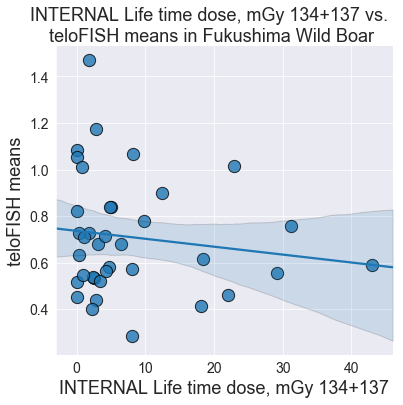

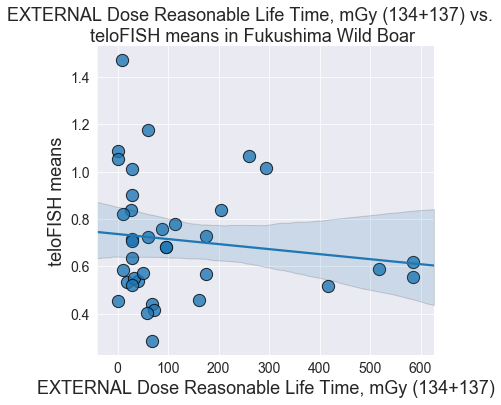

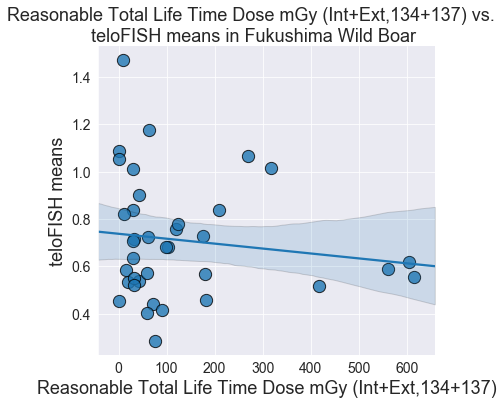

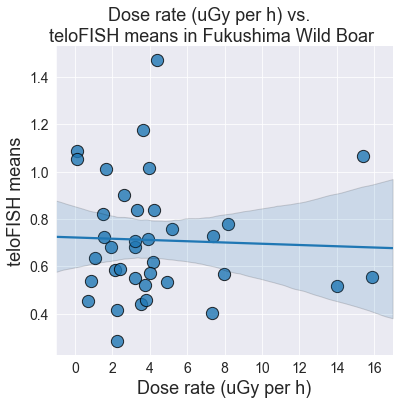

In [105]:
for col in dose_types:
    f_tm.linear_regression_graphs_between_variables(x=col, y='teloFISH means', data=merge_kelly_teloFISH_dose)

## Statistics

In [114]:
dose_types = ['INTERNAL Life time dose, mGy 134+137',
              'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
              'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
              'Dose rate (uGy per h)'
             ]

In [127]:
merge_kelly_teloFISH_dose['encoded sex'] = merge_kelly_teloFISH_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [125]:
y = merge_kelly_teloFISH_dose['teloFISH means'].values.reshape(-1, 1)

for Xn in dose_types:
    features_list = [[Xn], [Xn, 'Age (months)'], [Xn, 'Age (months)', 'encoded sex']]
    for features in features_list:
        X = merge_kelly_teloFISH_dose[features].values.reshape(-1, len(features))
        fit_lm = LinearRegression().fit(X, y)
        print(f'OLS | {features} vs. teloFISH means --> R2: {fit_lm.score(X, y):.4f}')
    print('')

OLS | ['INTERNAL Life time dose, mGy 134+137'] vs. teloFISH means --> R2: 0.0190
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)'] vs. teloFISH means --> R2: 0.0193
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)', 'encoded sex'] vs. teloFISH means --> R2: 0.0413

OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)'] vs. teloFISH means --> R2: 0.0183
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)'] vs. teloFISH means --> R2: 0.0187
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)', 'encoded sex'] vs. teloFISH means --> R2: 0.0421

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. teloFISH means --> R2: 0.0191
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. teloFISH means --> R2: 0.0193
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. teloFISH means --> R2: 0.0436

OLS | ['Dose rate (uGy per h)'] vs. t

# Cortisol and Dose
---

In [98]:
merge_kelly_dose_cortisol = kelly_boar_dose.merge(prep_boar_cortisol_df, on=['Sample ID'])
merge_kelly_dose_cortisol 
# merge_kelly_cortisol_exposure['Age (weeks)'] = merge_kelly_cortisol_exposure['Age (weeks)'].apply(lambda row: f_tm.average_age_weeks(row))
# merge_kelly_cortisol_exposure['Age (weeks)'] = merge_kelly_cortisol_exposure['Age (weeks)'].astype('int')

# merge_kelly_cortisol_exposure.to_csv('../excel data/graphing/merge_kelly_cortisol_exposure.csv', index=False)

,Sample ID,Place name,Long.,Lat.,"MEXT uSv/h, @ 1m, max, at capture site","MEXT uSv/h, reasonable, midpoint of column I",Unnamed: 11,Sex,Age (weeks),Age (hours),...,"INTERNAL Life time dose, mGy 134+137","EXTERNAL Dose Reasonable Life Time, mGy (134+137)",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)","Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)",Age (months),Sample Number (electronic sheet),Cortisol (pg/mg)
0,1607261,Okuma,37.415958,141.012303,40.0,40.0,2014-11-01 00:00:00,Female,87,14616,...,29.200071,584.6400,4.994539,584.6400,613.840071,613.840071,15.849122,20,160726-1,6.736842
1,1607262,Okuma,37.393036,140.995272,19.0,14.0,2014-11-01 00:00:00,Male,87,14616,...,4.997361,204.6240,2.442217,277.7040,209.621361,282.701361,3.316593,20,160726-2,7.087576
2,1607264,Okuma,37.400028,140.989244,9.5,6.6,2014-11-01 00:00:00,Female,80,13440,...,31.137820,88.7040,35.103062,127.6800,119.841820,158.817820,5.162829,18,160726-4,5.360000
3,1607281,Katsurao,37.528640,140.798470,9.5,6.6,2014-11-01 00:00:00,Female,63-68,11004,...,18.031323,72.6264,24.827505,104.5380,90.657723,122.569323,2.257504,15,160728-1,5.445329
4,1611301O210,Okuma,37.408318,140.952015,19.0,14.0,Jun-12,Female,220,36960,...,42.943361,517.4400,8.299196,702.2400,560.383361,745.183361,2.411084,51,161130-1 O-210 collar,17.120000
5,1611302O211,Okuma,37.399016,140.971983,9.5,6.6,2014-11-01 00:00:00,Female,87,14616,...,6.408631,96.4656,6.643437,138.8520,102.874231,145.260631,1.908857,20,161130-2 O-211,5.477178
6,1611305O214,Okuma,37.414074,140.987373,40.0,40.0,2014-11-01 00:00:00,Female,87,14616,...,18.404285,584.6400,3.147969,584.6400,603.044285,603.044285,4.167048,20,161130-5 O-214 collar,4.240000
7,161206O231,Okuma,37.429225,141.009476,40.0,40.0,2014-11-01 00:00:00,Female,62,10416,...,0.000000,416.6400,0.000000,416.6400,416.640000,416.640000,14.000000,14,161206 O-231,29.600000
8,161208O236,Okuma,37.414074,140.987373,19.0,14.0,2015-11-01 00:00:00,Female,48,8064,...,9.786261,112.8960,8.668386,153.2160,122.682261,163.002261,8.167048,11,161208 O-236,8.320000
9,161215T1,Tochigi,36.439514,139.642847,0.1,0.1,2014-11-01 00:00:00,Female,87,14616,...,0.005152,1.4616,0.352460,1.4616,1.466752,1.466752,0.100400,20,161215 T-1,29.120000


In [282]:
merge_kelly_cortisol_exposure.drop(6, axis=0, inplace=True)

In [283]:
# columns we'll graph telomere length by teloFISH against 
y_cols_to_graph = [
'INTERNAL Life time dose, mGy Cs 134+137',
'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)']

In [287]:
def multiple_linear_regression_graphs_between_variables(x=None, y_cols_to_graph=None,
                                                        data=None, hue=None, col=None,
                                                       hue_order=None, col_order=None):

    for y in y_cols_to_graph:

        ax=sns.lmplot(x=x, y=y, hue=hue, col=col, data=data,
        height=5, aspect=1, scatter_kws={"s": 70, "edgecolor":'black'},
        hue_order=hue_order, col_order=col_order)

        fig = ax.fig 
        fig.suptitle(f'{x} vs. {y}\nper Sex in Fukushima Wild Boar', fontsize=14, weight='bold')
        ax.set_xlabels(x, fontsize=12)
        ax.set_ylabels(y, fontsize=12)
        plt.subplots_adjust(top=0.84)
        fig.legend(fontsize='medium')
    #     ax.savefig(f"../graphs/Mean Telomere Length by FISH vs {name_current}.png")

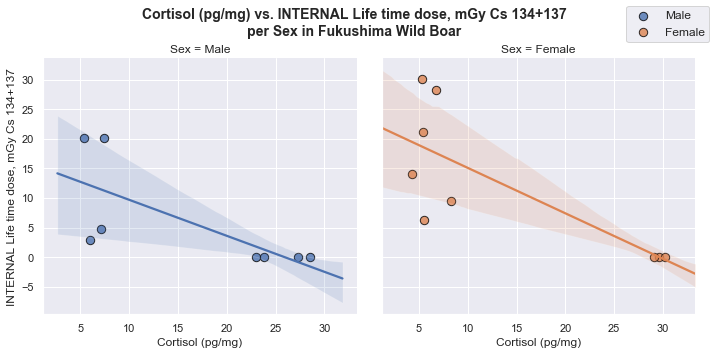

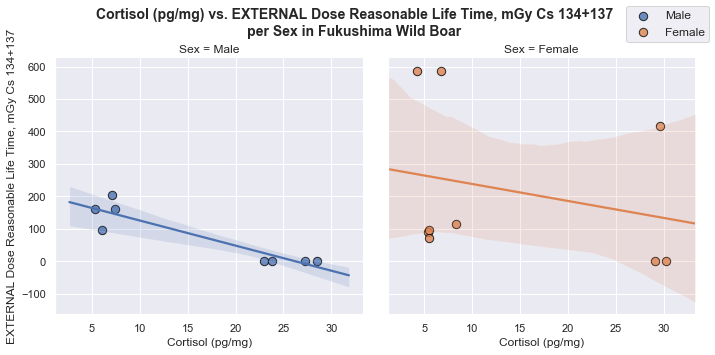

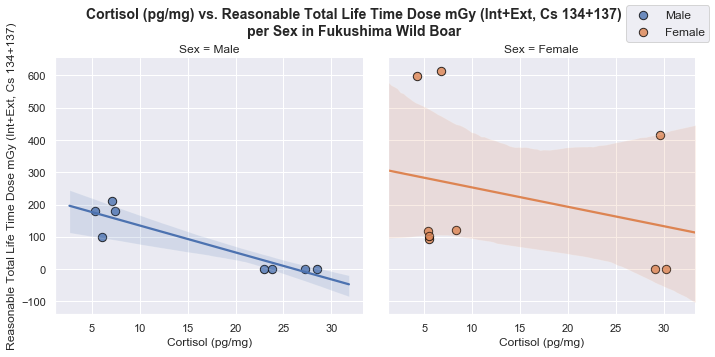

In [288]:
x='Cortisol (pg/mg)'
data = merge_kelly_cortisol_exposure
hue='Sex'
col='Sex'

multiple_linear_regression_graphs_between_variables(x=x, y_cols_to_graph=y_cols_to_graph,
                                                    data=data, hue=hue, col=col,
                                                   hue_order=['Male', 'Female',],
                                                   col_order=['Male', 'Female',])

In [13]:
# correlation between internal .. external for kelly's boar 

In [15]:
# merge_kelly_teloFISH_exposure.corr()

# Aryn Data (telomere length qPCR)

In [45]:
aryn_boar_df = pd.read_csv('../excel data/cleaned/aryn_boar_df.csv')

aryn_snake_df = pd.read_csv('../excel data/cleaned/aryn_snake_df.csv')

In [5]:
print(aryn_boar_df.shape)

(46, 16)


In [15]:
aryn_boar_df.drop([1, 31], axis=0, inplace=True)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
def score_linear_regressions(x=None, y=None, data=None):
    
#     for y in y_cols:
    
#     sexes = ['M', 'F', 'Overall']
    sexes = ['Overall']

    for sex in sexes:
        if sex == 'Overall':
            X_r = data[x].values.reshape(-1, len(x))
            y_r = data[y].values.reshape(-1, 1)
            regression = LinearRegression().fit(X_r,y_r)
            print(f'Linear regression for {x} vs. {y}:\nOverall R2 is {regression.score(X_r, y_r):.4f}\n')

        else:
            X_r = data[data['Sex'] == sex][x].values.reshape(-1, len(x))
            y_r = data[data['Sex'] == sex][y].values.reshape(-1, 1)
            regression = LinearRegression().fit(X_r,y_r)
            print(f"Linear regression for {x} vs. {y}:\nR2 for {sex}s is {regression.score(X_r, y_r):.4f}")

In [20]:
x= ['External Dose (uSv)', 'Estimated Age (months)']

score_linear_regressions(x=x, y='Normalized T/A Average (Average Telomere Length)', data=aryn_boar_df)

Linear regression for ['External Dose (uSv)', 'Estimated Age (months)'] vs. Normalized T/A Average (Average Telomere Length):
Overall R2 is 0.0318



In [21]:
x= ['External Dose (uSv)',]

score_linear_regressions(x=x, y='Normalized T/A Average (Average Telomere Length)', data=aryn_boar_df)

Linear regression for ['External Dose (uSv)'] vs. Normalized T/A Average (Average Telomere Length):
Overall R2 is 0.0113



In [27]:
aryn_boar_df.head(4)

,Exposure Status,Sample ID,Sex,Age,Age Class,Estimated Age (months),External Dose (uSv),Internal Dose (uSv),qPCR ID,Concentration (ng/mcL),260/280,Normalized T/A Average (Average Telomere Length),Cortisol,Dicentrics (TC-FISH),PH anomalies,Encoded Exposed
0,Control,180526C3,M,NaN,Yearling,15.0,0.38,NaN,C1,14.5,1.9,0.910559,NaN,NaN,NaN,0
2,Control,180604C2,F,NaN,Yearling,18.0,0.46,NaN,C3,15.8,1.9,1.117980,NaN,NaN,NaN,0
3,Control,180612C1,M,NaN,Yearling,15.0,0.27,NaN,C4,13.1,1.6,1.260040,NaN,NaN,NaN,0
4,Control,180627C1,M,NaN,Juv+,10.0,0.32,NaN,C5,6.2,1.7,1.476052,NaN,NaN,NaN,0


In [30]:
aryn_boar_df.rename(columns={'Normalized T/A Average (Average Telomere Length)': 'Mean Telomere Length (qPCR)'}, inplace=True)

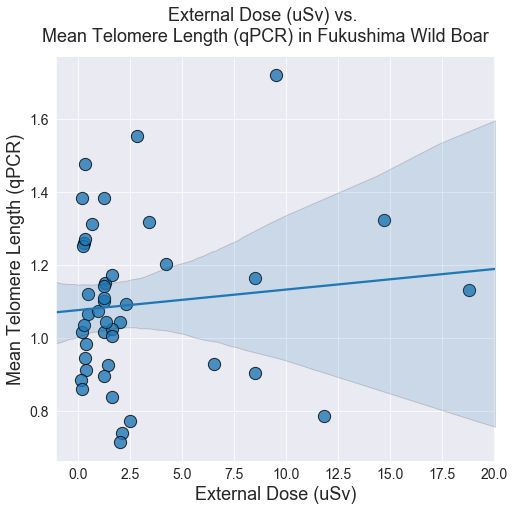

In [31]:
y='Mean Telomere Length (qPCR)'
x='External Dose (uSv)'
data=aryn_boar_df

f_tm.linear_regression_graphs_between_variables(x=x, y=y, data=data)

# ax=sns.lmplot(x=x, y=y, data=data,
#         height=7, aspect=1, scatter_kws={"s": 150, "edgecolor":'black'})

# fig = ax.fig 

# ax.set_xlabels(x, fontsize=18)
# ax.set_xticklabels(fontsize=14)
# ax.set_ylabels(y, fontsize=18)
# ax.set_yticklabels(fontsize=14)
# ax.set_titles(size=14)

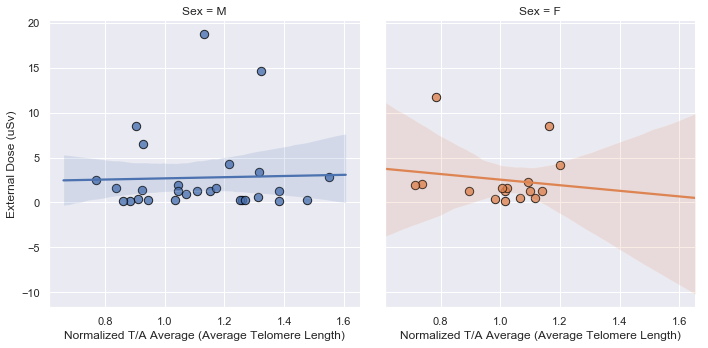

In [301]:
sns.lmplot(x='Normalized T/A Average (Average Telomere Length)', y='External Dose (uSv)', 
           
           scatter_kws={
               "s": 70,
               "edgecolor":"black"
           },
           data=aryn_boar_df)

In [32]:
aryn_snake_df.head(4)

,Sample ID,Concentration (ng/mcL),260/280,Sex,External Dose (uSv),Internal Dose (uSv),Telomere Length,Exposure Status,Encoded Exposed
0,CEC10,19.3,1.96,F,0.10,NaN,0.444298,Control,0
1,CEC18,63.7,1.83,F,0.16,NaN,0.826190,Control,0
2,CEC22,45.5,1.88,F,0.17,NaN,2.067214,Control,0
3,CEC23,32.6,1.83,F,0.20,NaN,1.389182,Control,0


In [46]:
aryn_snake_df.rename(columns={'Telomere Length': 'Mean Telomere Length (qPCR)'}, inplace=True)

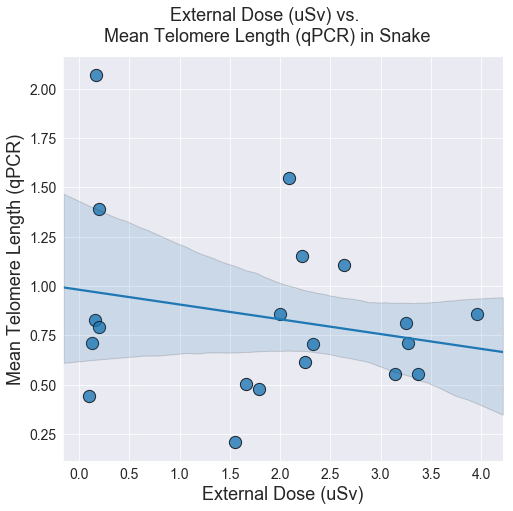

In [50]:
y='Mean Telomere Length (qPCR)'
x='External Dose (uSv)'
data=aryn_snake_df
ax=sns.lmplot(x=x, y=y, data=data,
height=7, aspect=1, scatter_kws={"s": 150, "edgecolor":'black'})

fig = ax.fig 

ax.set_xlabels(x, fontsize=18)
ax.set_xticklabels(fontsize=14)
ax.set_ylabels(y, fontsize=18)
ax.set_yticklabels(fontsize=14)
ax.set_titles(size=14)


plt.subplots_adjust(top=0.88)

fig.suptitle(f'{x} vs.\n {y} in Snake', fontsize=18,) 
ax.savefig(f"../graphs/{x} vs {y} in Snake.png", dpi=400)

In [53]:
aryn_snake_df.drop(4, axis=0, inplace=True)

In [54]:
x= ['External Dose (uSv)']

score_linear_regressions(x=x, y='Mean Telomere Length (qPCR)', data=aryn_snake_df)

Linear regression for ['External Dose (uSv)'] vs. Mean Telomere Length (qPCR):
Overall R2 is 0.0488



# Josh Data (PPHA)

In [329]:
josh_ppha_df_cortisol = pd.read_csv('../excel data/cleaned/josh_ppha_df_cortisol.csv')
merge_josh_ppha_df = pd.read_csv('../excel data/cleaned/merge_josh_ppha_df.csv')
merge_josh_age_sex_ppha_df = pd.read_csv('../excel data/cleaned/merge_josh_age_sex_ppha_df.csv')

In [344]:
merge_josh_age_sex_ppha_df.head(4)

,Sample ID,Age (weeks),PPHAs,Normal Neutrophils,Total cells counted,Gy,%PPHA,Sex
0,Ba20170605,49,3,1507.0,1510.0,0.2630,0.198675,M
1,Ba20170609,220,13,526.0,539.0,2.4030,2.411874,F
2,Bb20170609,49,5,545.0,550.0,0.1460,0.909091,M
3,Ba20170615,220,4,537.0,541.0,0.4377,0.739372,F


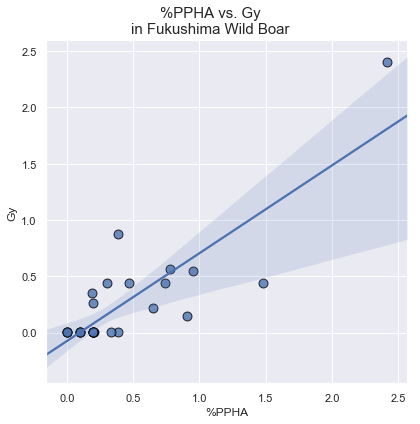

In [331]:
x='%PPHA'
y='Gy'
data=merge_josh_ppha_df
hue=None
col=None

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

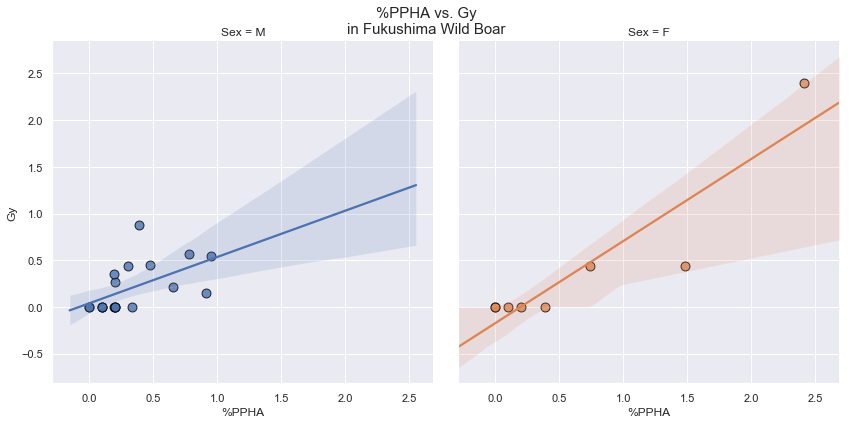

In [333]:
x='%PPHA'
y='Gy'
data=merge_josh_age_sex_ppha_df
hue='Sex'
col='Sex'

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

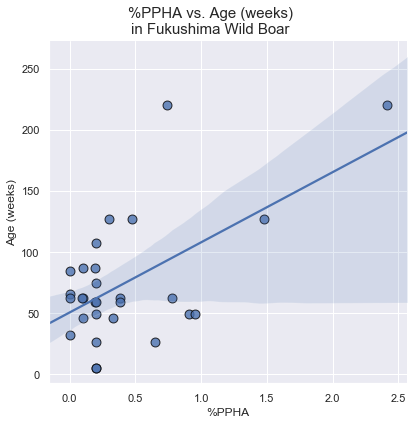

In [335]:
x='%PPHA'
y='Age (weeks)'
data=merge_josh_ppha_df
hue=None
col=None

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

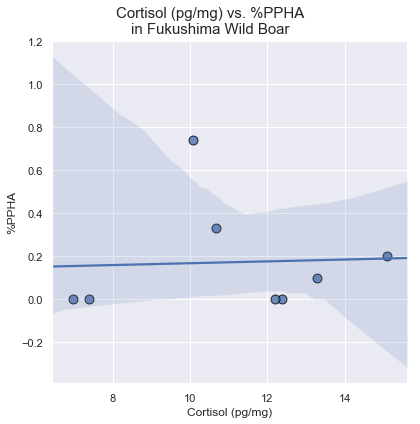

In [316]:
x='Cortisol (pg/mg)'
y='%PPHA'
data=josh_ppha_df_cortisol
hue=None
col=None

ax = sns.set(font_scale=1)
ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=data, 
                height=6, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 
fig.suptitle(f'{x} vs. {y}\nin Fukushima Wild Boar', fontsize=15,)
plt.subplots_adjust(top=0.9)

In [347]:
kelly_dicentrics = pd.read_csv('../excel data/cleaned/kelly_boar_dicentrics_df.csv')

merge_test = merge_kelly_teloFISH_exposure.merge(kelly_dicentrics, on=['Sample ID'])
merge_test.head(1)

,Sample ID,teloFISH data,teloFISH means,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),Average Dicentrics per cell
0,1606103,"[0.9942074384031242, 0.33512610283251376, 0.16...",0.439557,Male,29,0.15108850000000001,0.494718,0.7361031720000001,0.808553,2.410267,3.21882,68.208,4.719123130717804,92.568,71.42682,95.78682,3.645807,0.0


No handles with labels found to put in legend.


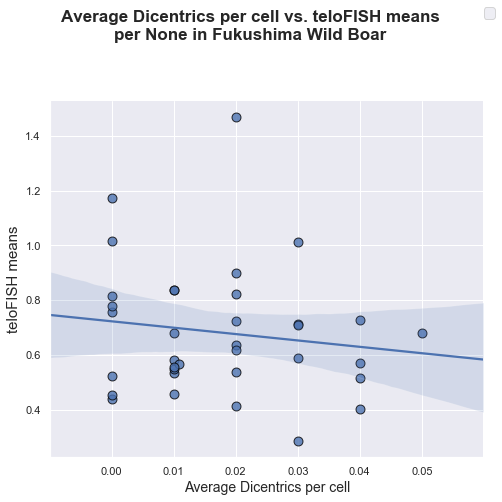

In [349]:
x='Average Dicentrics per cell'
y='teloFISH means'
hue=None
col=None

if "/" in name_x:
        name_x = x.replace("/", '')
else:
    name_x = x
        
if "/" in name_y:
        name_y = y.replace("/", '')
else:
    name_y = y

ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=merge_test, height=7, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 

fig.suptitle(f'{x} vs. {y}\nper {hue} in Fukushima Wild Boar', fontsize=17, weight='bold')
ax.set_xlabels(x, fontsize=14)
ax.set_ylabels(y, fontsize=15)
plt.subplots_adjust(top=0.8)
# fig.legend(fontsize='large')
ax.savefig(f"../graphs/{name_x} vs. {name_y} Fukushima Wild Boar.png")

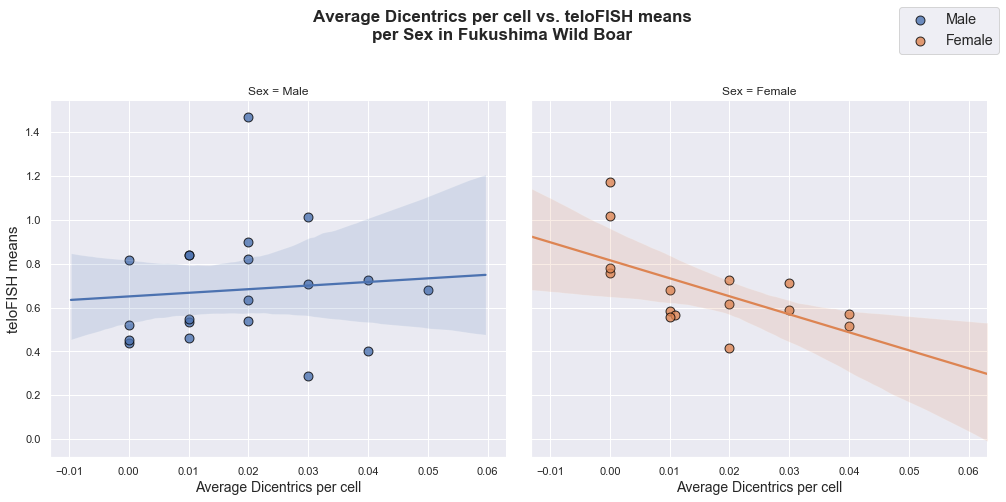

In [350]:
x='Average Dicentrics per cell'
y='teloFISH means'
hue='Sex'
col='Sex'

if "/" in name_x:
        name_x = x.replace("/", '')
else:
    name_x = x
        
if "/" in name_y:
        name_y = y.replace("/", '')
else:
    name_y = y

ax = sns.lmplot(x=x, y=y, hue=hue, col=col, data=merge_test, height=7, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'})

fig = ax.fig 

fig.suptitle(f'{x} vs. {y}\nper {hue} in Fukushima Wild Boar', fontsize=17, weight='bold')
ax.set_xlabels(x, fontsize=14)
ax.set_ylabels(y, fontsize=15)
plt.subplots_adjust(top=0.8)
fig.legend(fontsize='large')
ax.savefig(f"../graphs/{name_x} vs. {name_y} Fukushima Wild Boar.png")